In [30]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import gmaps
from config import gkey
import requests

gmaps.configure(api_key=gkey)

spend_df = pd.read_csv("chargedata.csv")

spend_df.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,11,1014783.45,171081.18,141193.91
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,28,382051.00,194081.39,167511.96
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,UNIVERSITY OF CALIFORNIA SAN DIEGO MEDICAL CENTER,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,21,971881.48,324050.71,294419.62


In [31]:
#group costs for the same procedure
spend_df["DRG Definition"] = spend_df["DRG Definition"].replace(
    {"870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS": "870 - SEPTICEMIA OR SEVERE SEPSIS", 
     "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC": "870 - SEPTICEMIA OR SEVERE SEPSIS",
     "872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC": "870 - SEPTICEMIA OR SEVERE SEPSIS",
     "469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W MCC": "469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY",
     "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC": "469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY",
     "291 - HEART FAILURE & SHOCK W MCC": "291 - HEART FAILURE & SHOCK",
     "292 - HEART FAILURE & SHOCK W CC": "291 - HEART FAILURE & SHOCK",
     "293 - HEART FAILURE & SHOCK W/O CC/MCC": "291 - HEART FAILURE & SHOCK",
     "391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W MCC": "391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS",
     "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC": "391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS",
     "689 - KIDNEY & URINARY TRACT INFECTIONS W MCC": "689 - KIDNEY & URINARY TRACT INFECTIONS",
     "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC": "689 - KIDNEY & URINARY TRACT INFECTIONS",
     "193 - SIMPLE PNEUMONIA & PLEURISY W MCC": "193 - SIMPLE PNEUMONIA & PLEURISY",
     "194 - SIMPLE PNEUMONIA & PLEURISY W CC": "193 - SIMPLE PNEUMONIA & PLEURISY",
     "195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC": "193 - SIMPLE PNEUMONIA & PLEURISY",
     "682 - RENAL FAILURE W MCC": "682 - RENAL FAILURE",
     "683 - RENAL FAILURE W CC": "682 - RENAL FAILURE",
     "684 - RENAL FAILURE W/O CC/MCC": "682 - RENAL FAILURE",
     "190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC": "190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE",
     "191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC": "190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE",
     "192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC": "190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE",
     "377 - G.I. HEMORRHAGE W MCC": "377 - G.I. HEMORRHAGE",
     "378 - G.I. HEMORRHAGE W CC": "377 - G.I. HEMORRHAGE",
     "379 - G.I. HEMORRHAGE W/O CC/MCC": "377 - G.I. HEMORRHAGE",
     "602 - CELLULITIS W MCC": "602 - CELLULITIS",
     "603 - CELLULITIS W/O MCC": "602 - CELLULITIS",
     "640 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W MCC": "640 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES",
     "641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC": "640 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES",
     "064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC": "064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION",
     "065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC OR TPA IN 24 HRS": "064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION",
     "066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC": "064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION",
     "308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W MCC": "308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS",
     "309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W CC": "308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS",
     "310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W/O CC/MCC": "308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS",
     "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS": "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT",
     "247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC": "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT",
     "248 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT W MCC OR 4+ VES/STENTS": "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT",
     "249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT W/O MCC": "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT",
     "250 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W MCC": "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT",
     "251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC": "246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT",
     "480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W MCC": "480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT",
     "481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W CC": "480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT",
     "482 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W/O CC/MCC": "480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT",
     "286 - CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH W MCC": "286 - CIRCULATORY DISORDERS EXCEPT AMI",
     "287 - CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH W/O MCC": "286 - CIRCULATORY DISORDERS EXCEPT AMI",
     "459 - SPINAL FUSION EXCEPT CERVICAL W MCC": "459 - SPINAL FUSION EXCEPT CERVICAL",
     "460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC": "459 - SPINAL FUSION EXCEPT CERVICAL",
     "177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC": "177 - RESPIRATORY INFECTIONS & INFLAMMATIONS",
     "178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC": "177 - RESPIRATORY INFECTIONS & INFLAMMATIONS",
     "179 - RESPIRATORY INFECTIONS & INFLAMMATIONS W/O CC/MCC": "177 - RESPIRATORY INFECTIONS & INFLAMMATIONS",
     "811 - RED BLOOD CELL DISORDERS W MCC": "811 - RED BLOOD CELL DISORDERS",
     "812 - RED BLOOD CELL DISORDERS W/O MCC": "811 - RED BLOOD CELL DISORDERS",
     "280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE W MCC": "280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE",
     "281 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE W CC": "280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE",
     "282 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE W/O CC/MCC": "280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE",
     "853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC": "854 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE",
     "854 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W CC": "854 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE",
     "207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS": "207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT",
     "208 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS": "207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT",
     "551 - MEDICAL BACK PROBLEMS W MCC": "551 - MEDICAL BACK PROBLEMS",
     "552 - MEDICAL BACK PROBLEMS W/O MCC": "551 - MEDICAL BACK PROBLEMS",
     "388 - G.I. OBSTRUCTION W MCC": "388 - G.I. OBSTRUCTION",
     "389 - G.I. OBSTRUCTION W CC": "388 - G.I. OBSTRUCTION",
     "390 - G.I. OBSTRUCTION W/O CC/MCC": "388 - G.I. OBSTRUCTION",
     "329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC": "329 - MAJOR SMALL & LARGE BOWEL PROCEDURES",
     "330 - MAJOR SMALL & LARGE BOWEL PROCEDURES W CC": "329 - MAJOR SMALL & LARGE BOWEL PROCEDURES",
     "331 - MAJOR SMALL & LARGE BOWEL PROCEDURES W/O CC/MCC": "329 - MAJOR SMALL & LARGE BOWEL PROCEDURES",
     "637 - DIABETES W MCC": "637 - DIABETES",
     "638 - DIABETES W CC": "637 - DIABETES",
     "639 - DIABETES W/O CC/MCC": "637 - DIABETES",
     "314 - OTHER CIRCULATORY SYSTEM DIAGNOSES W MCC": "314 - OTHER CIRCULATORY SYSTEM DIAGNOSES",
     "315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC": "314 - OTHER CIRCULATORY SYSTEM DIAGNOSES",
     "316 - OTHER CIRCULATORY SYSTEM DIAGNOSES W/O CC/MCC": "314 - OTHER CIRCULATORY SYSTEM DIAGNOSES",
     "698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W MCC": "698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES",
     "699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC":  "698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES",
     "700 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W/O CC/MCC": "698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES",
     "393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC": "393 - OTHER DIGESTIVE SYSTEM DIAGNOSES",
     "394 - OTHER DIGESTIVE SYSTEM DIAGNOSES W CC": "393 - OTHER DIGESTIVE SYSTEM DIAGNOSES",
     "395 - OTHER DIGESTIVE SYSTEM DIAGNOSES W/O CC/MCC": "393 - OTHER DIGESTIVE SYSTEM DIAGNOSES",
     "100 - SEIZURES W MCC": "100 - SEIZURES",
     "101 - SEIZURES W/O MCC": "100 - SEIZURES",
     "947 - SIGNS & SYMPTOMS W MCC": "947 - SIGNS & SYMPTOMS",
     "948 - SIGNS & SYMPTOMS W/O MCC": "947 - SIGNS & SYMPTOMS",
     "252 - OTHER VASCULAR PROCEDURES W MCC": "252 - OTHER VASCULAR PROCEDURES",
     "253 - OTHER VASCULAR PROCEDURES W CC": "252 - OTHER VASCULAR PROCEDURES",
     "254 - OTHER VASCULAR PROCEDURES W/O CC/MCC": "252 - OTHER VASCULAR PROCEDURES",
     "471 - CERVICAL SPINAL FUSION W MCC": "471 - CERVICAL SPINAL FUSION",
     "472 - CERVICAL SPINAL FUSION W CC": "471 - CERVICAL SPINAL FUSION",
     "473 - CERVICAL SPINAL FUSION W/O CC/MCC": "471 - CERVICAL SPINAL FUSION",
     "037 - EXTRACRANIAL PROCEDURES W MCC": "037 - EXTRACRANIAL PROCEDURES",
     "038 - EXTRACRANIAL PROCEDURES W CC": "037 - EXTRACRANIAL PROCEDURES",
     "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC": "037 - EXTRACRANIAL PROCEDURES",
     "371 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS W MCC": "371 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS",
     "372 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS W CC": "371 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS",
     "373 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS W/O CC/MCC": "371 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS",
     "237 - MAJOR CARDIOVASC PROCEDURES W MCC": "237 - MAJOR CARDIOVASC PROCEDURES",
     "238 - MAJOR CARDIOVASC PROCEDURES W/O MCC":"237 - MAJOR CARDIOVASC PROCEDURES",
     "894 - ALCOHOL/DRUG ABUSE OR DEPENDENCE, LEFT AMA": "894 - ALCOHOL/DRUG ABUSE OR DEPENDENCE",
     "895 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W REHABILITATION THERAPY": "894 - ALCOHOL/DRUG ABUSE OR DEPENDENCE",
     "896 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W MCC": "894 - ALCOHOL/DRUG ABUSE OR DEPENDENCE",
     "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC": "894 - ALCOHOL/DRUG ABUSE OR DEPENDENCE",
     "175 - PULMONARY EMBOLISM W MCC": "175 - PULMONARY EMBOLISM",
     "176 - PULMONARY EMBOLISM W/O MCC": "175 - PULMONARY EMBOLISM",
     "299 - PERIPHERAL VASCULAR DISORDERS W MCC": "299 - PERIPHERAL VASCULAR DISORDERS",
     "300 - PERIPHERAL VASCULAR DISORDERS W CC": "299 - PERIPHERAL VASCULAR DISORDERS",
     "301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC": "299 - PERIPHERAL VASCULAR DISORDERS",
     "202 - BRONCHITIS & ASTHMA W CC/MCC": "202 - BRONCHITIS & ASTHMA",
     "203 - BRONCHITIS & ASTHMA W/O CC/MCC": "202 - BRONCHITIS & ASTHMA",
     "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC": "917 - POISONING & TOXIC EFFECTS OF DRUGS",
     "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC": "917 - POISONING & TOXIC EFFECTS OF DRUGS",
     "242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC": "242 - PERMANENT CARDIAC PACEMAKER IMPLANT",
     "243 - PERMANENT CARDIAC PACEMAKER IMPLANT W CC":  "242 - PERMANENT CARDIAC PACEMAKER IMPLANT",
     "244 - PERMANENT CARDIAC PACEMAKER IMPLANT W/O CC/MCC": "242 - PERMANENT CARDIAC PACEMAKER IMPLANT",
     "056 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W MCC": "056 - DEGENERATIVE NERVOUS SYSTEM DISORDERS",
     "057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC": "056 - DEGENERATIVE NERVOUS SYSTEM DISORDERS",
     "438 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY W MCC": "438 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY",
     "439 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY W CC": "438 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY",
     "440 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY W/O CC/MCC": "438 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY"
})

In [32]:
len(spend_df)

201876

In [33]:


outlier = spend_df.loc[spend_df["Provider Zip Code"] == 48091]

spend_df = spend_df[spend_df["Provider Zip Code"] != 48091]

len(spend_df)

201875

In [34]:
#find most common procedures
by_drug = spend_df.groupby("DRG Definition").sum().reset_index()
by_drug = by_drug.sort_values(by="Total Discharges", ascending=False)
top_drugs = by_drug.head(50)
top_drugs


,DRG Definition,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
440,870 - SEPTICEMIA OR SEVERE SEPSIS,1691545624,333740363,701899,4.383388e+08,1.072347e+08,9.477763e+07
252,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,946415920,184997579,482891,2.493510e+08,6.179899e+07,5.235703e+07
161,291 - HEART FAILURE & SHOCK,1900335811,359140622,468489,2.231724e+08,5.847102e+07,4.968676e+07
109,193 - SIMPLE PNEUMONIA & PLEURISY,1887986057,358429633,342054,2.232848e+08,5.657293e+07,4.643279e+07
108,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE,1815514453,334221505,312704,1.973055e+08,4.992803e+07,4.056619e+07
362,682 - RENAL FAILURE,1434052625,265443301,280029,1.815725e+08,4.618086e+07,3.879630e+07
171,308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS,1573441425,290946672,233342,1.651962e+08,3.950203e+07,3.114996e+07
365,689 - KIDNEY & URINARY TRACT INFECTIONS,1206509403,228649011,226307,1.225555e+08,3.161105e+07,2.590536e+07
213,"391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",1060366717,204285003,222709,1.222137e+08,2.917906e+07,2.331046e+07
41,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1351545500,259084617,217649,2.097180e+08,4.701654e+07,3.857955e+07


In [35]:
# create df of avg costs by procedure
drugnames = []
avgprice = []

avg_charge = spend_df.groupby("DRG Definition").mean().reset_index()
avg_charge = avg_charge.set_index("DRG Definition")

for x in range(len(top_drugs)):
    drugnames.append(top_drugs["DRG Definition"])
drugnames = drugnames[0]

for drug in drugnames:
    avgprice.append(avg_charge.loc[drug, "Average Total Payments"])
                    
avg_cost_df = pd.DataFrame({"DRG Definition": drugnames,
                           "National Average Charge": avgprice}).set_index("DRG Definition").round(decimals=2)
avg_cost_df.head()


,National Average Charge
DRG Definition,
870 - SEPTICEMIA OR SEVERE SEPSIS,16198.59
469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY,16996.42
291 - HEART FAILURE & SHOCK,7995.49
193 - SIMPLE PNEUMONIA & PLEURISY,7774.21
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE,7113.27


In [36]:
topspend_df = spend_df.set_index("DRG Definition")
topspend_df = topspend_df.loc[drugnames]
print(len(topspend_df))
todrop = ["Provider Id", "Provider Street Address", "Provider City", "Hospital Referral Region (HRR) Description", "Average Covered Charges", "Average Medicare Payments"]
topspend_df = topspend_df.drop(columns = todrop)
topspend_df = topspend_df.rename(columns={"Average Total Payments": "Average Charge"})
topspend_df["DRG Definition"] = topspend_df.index
len(topspend_df)
topspend_df.head()

151916


,Provider Name,Provider State,Provider Zip Code,Total Discharges,Average Charge,DRG Definition
DRG Definition,,,,,,
870 - SEPTICEMIA OR SEVERE SEPSIS,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,22,30136.68,870 - SEPTICEMIA OR SEVERE SEPSIS
870 - SEPTICEMIA OR SEVERE SEPSIS,ELIZA COFFEE MEMORIAL HOSPITAL,AL,35631,20,29278.15,870 - SEPTICEMIA OR SEVERE SEPSIS
870 - SEPTICEMIA OR SEVERE SEPSIS,ST VINCENT'S EAST,AL,35235,16,33741.44,870 - SEPTICEMIA OR SEVERE SEPSIS
870 - SEPTICEMIA OR SEVERE SEPSIS,BAPTIST MEDICAL CENTER SOUTH,AL,36116,24,30909.96,870 - SEPTICEMIA OR SEVERE SEPSIS
870 - SEPTICEMIA OR SEVERE SEPSIS,JACKSON HOSPITAL & CLINIC INC,AL,36106,24,32138.96,870 - SEPTICEMIA OR SEVERE SEPSIS


In [37]:
censusdata = pd.read_csv("Full_ZH_Info.csv")


In [38]:
natl_charge = []
dif = []
for x in topspend_df:
    drug = topspend_df["DRG Definition"]
    
    natl_charge.append(avg_cost_df.loc[drug, "National Average Charge"])


topspend_df = topspend_df.reset_index(drop=True)
natl_charge = natl_charge[0].reset_index(drop=True)
topspend_df["National Average Charge"] = natl_charge 
topspend_df["Difference"] = topspend_df["Average Charge"] - topspend_df["National Average Charge"]

topspend_df = topspend_df.rename(columns={"Provider Zip Code": "Zipcode"})

correct_zips = []

for zipcode in topspend_df["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
    
print(len(correct_zips))

topspend_df["Zipcode"] = correct_zips





151916


In [39]:
avg_dif_bystate = topspend_df.groupby("Provider State").mean().reset_index()
avg_dif_bystate.to_csv("bystate.csv", index=False)
print(len(avg_dif_bystate))
avg_dif_bystate.head()

51


,Provider State,Total Discharges,Average Charge,National Average Charge,Difference
0,AK,28.311404,16416.245570,11863.883289,4552.362281
1,AL,41.640388,8344.952050,10776.735152,-2431.783102
2,AR,41.060375,8849.336464,11140.655855,-2291.319391
3,AZ,36.679667,11574.483071,11589.176191,-14.693120
4,CA,37.056639,14569.154397,11150.078072,3419.076326


<function matplotlib.pyplot.show>

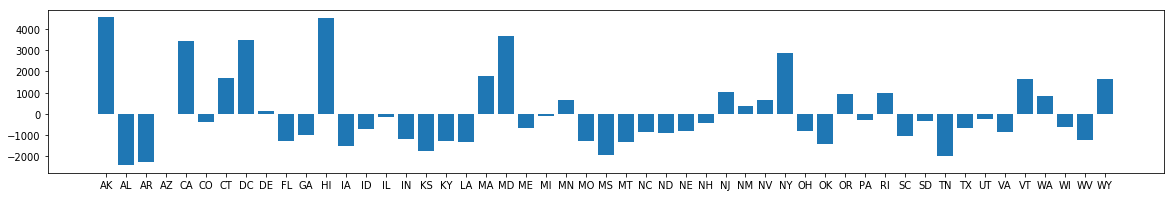

In [40]:
plt.figure(figsize=(20,3))
plt.bar(avg_dif_bystate["Provider State"], avg_dif_bystate["Difference"])
plt.show

In [41]:
avg_dif_byzip = topspend_df.groupby("Zipcode").mean().reset_index()

correct_zips = []
print(len(avg_dif_byzip))
for zipcode in avg_dif_byzip["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
    
print(len(correct_zips))

avg_dif_byzip["Zipcode"] = correct_zips


avg_dif_byzip.head()

2931
2931


,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference
0,10003,72.719626,16867.592710,11566.621963,5300.970748
1,10016,50.691176,20250.382426,11320.090221,8930.292206
2,10019,43.461538,17563.180096,11485.672404,6077.507692
3,10021,108.977169,19834.264749,12282.212100,7552.052648
4,10029,72.064000,19553.343280,11457.785120,8095.558160


In [42]:
avg_dif_byzip.to_csv("byzip.csv", index=False)


<function matplotlib.pyplot.show>

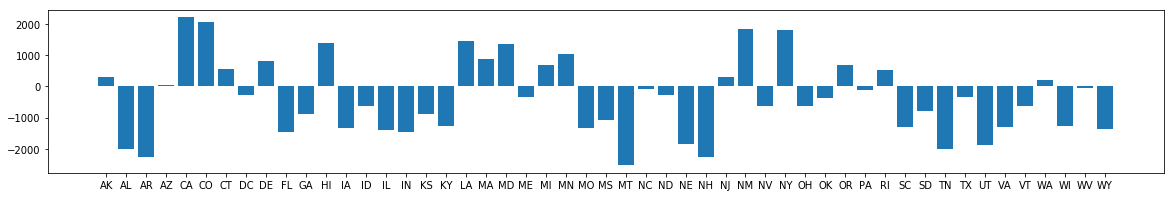

In [43]:
drugs_df = topspend_df.set_index("DRG Definition")

drugs_df = drugs_df.loc[["894 - ALCOHOL/DRUG ABUSE OR DEPENDENCE"]]

drugs_bystate = drugs_df.groupby("Provider State").mean().reset_index()
drugs_bystate_sum = drugs_df.groupby("Provider State").sum().reset_index()

drugs_bystate["Total Discharges (all)"] = drugs_bystate_sum["Total Discharges"]
drugs_bystate.head()
plt.figure(figsize=(20,3))
plt.bar(drugs_bystate["Provider State"], drugs_bystate["Difference"])
plt.show

#drugs_bystate.to_csv("drugtreatmentcosts.csv", index=False)

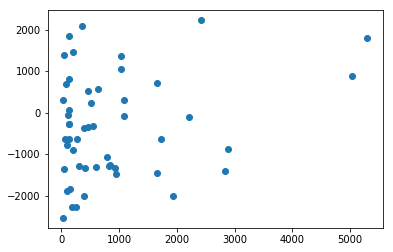

In [44]:
plt.scatter(drugs_bystate["Total Discharges (all)"], drugs_bystate["Difference"])
plt.show()

33120
